In [1]:
%run /home/sgiorgi/start_notebook.py

Importing FeatureWorker... mif and mm...
pandas as pd... numpy as np... matplotlib as mpl... pyplot as plt... seaborn as sns...
Start sqlalchemy engine for database (or hit Enter for None): dla_tutorial

Engine initialized with varname 'db_eng'



In [ ]:
# run this if you need to create your own message table, REPLACE XXX with your name
create_sql = "CREATE TABLE msgs_xxx LIKE msgsEn_r500"
db_eng.execute(create_sql)
insert_sql = "INSERT INTO msgs_xxx SELECT * FROM msgsEn_r500"
db_eng.execute(insert_sql)

In [23]:
# create a FeatureStar object
initFile = "/home/sgiorgi/initFiles/tutorialInit.txt"
fs = FeatureStar().fromFile(initFile)

In [25]:
# FeatureStar contains all classes in Feature Worker as attributes
print fs.__dict__.keys()

['fr', 'rp', 'fw', 'og', 'oa', 'fe', 'fg', 'cp', 'allFW']


In [26]:
# here we get an OutcomeGetter with fs.og 
# from this we can access OutcomeGetter attributes like group_freq_thresh and controls
print fs.og.group_freq_thresh, fs.og.outcome_controls

# we can also change these attributes
fs.og.group_freq_thresh = 1000
print fs.og.group_freq_thresh

500 ['big5_ope', 'big5_neu', 'big5_con', 'big5_agr', 'big5_ext']
1000


In [5]:
# perform standard feature extraction without fwInterface
unigramTable = fs.fe.addNGramTable(n=1)
print unigramTable

SQL QUERY: SELECT column_type FROM information_schema.columns WHERE table_schema='dla_tutorial' AND table_name='msgs_xxx' AND column_name='user_id'
SQL QUERY: DROP TABLE IF EXISTS feat$1gram$msgs_xxx$user_id$16to16
SQL QUERY: CREATE TABLE feat$1gram$msgs_xxx$user_id$16to16 (id BIGINT(16) UNSIGNED NOT NULL AUTO_INCREMENT PRIMARY KEY,
                 group_id varchar(45), feat VARCHAR(36) CHARACTER SET utf8mb4 COLLATE utf8mb4_bin, value INTEGER, group_norm DOUBLE,
              
SQL QUERY: SELECT column_type FROM information_schema.columns WHERE table_schema='dla_tutorial' AND table_name='msgs_xxx' AND column_name='user_id'
SQL QUERY: DROP TABLE IF EXISTS feat$meta_1gram$msgs_xxx$user_id$16to16
SQL QUERY: CREATE TABLE feat$meta_1gram$msgs_xxx$user_id$16to16 (id BIGINT(16) UNSIGNED NOT NULL AUTO_INCREMENT PRIMARY KEY,
                 group_id varchar(45), feat VARCHAR(16) CHARACTER SET utf8mb4 COLLATE utf8mb4_bin, value INTEGER, group_norm DOUBLE,
         
SQL QUERY: SELECT user_id FRO

feat$1gram$msgs_xxx$user_id$16to16


In [6]:
# get outcomes in a pandas dataframe
# note that group_freq_thresh applied is automatically applied
outAndCont = fs.og.getGroupsAndOutcomesAsDF()
outAndCont = outAndCont.rename(columns = {'demog_age':'age', 'demog_gender':'gender', 'big5_ope':'ope', 'big5_neu':'neu', 'big5_con':'con', 'big5_ext':'ext', 'big5_agr': 'agr'})

Loading Outcomes and Getting Groups for: set(['big5_ope', 'big5_ext', 'demog_gender', 'demog_age', 'big5_neu', 'big5_agr', 'big5_con'])
SQL QUERY: show tables like 'feat$1gram$msgs_xxx$user_id$16to16'
SQL QUERY: SELECT group_id, sum(value) FROM feat$1gram$msgs_xxx$user_id$16to16  WHERE  group_id in ('e73b38988d4a277a1ac12c258fb33a14','fb2eecbe942c268e0d47a377dde7831a','2a4ea8a5ac157246feedfcf72edad5ff','6a56f67c249e8e14403b3f40231cdde4','e571dcc7fa1a6f1ebb1aba8d05


In [7]:
outAndCont.head()

,age,gender,agr,con,ext,neu,ope
group_id,,,,,,,
003ae43fae340174a67ffbcf19da1549,27,1,3.60,4.30,3.80,1.70,3.70
01f6c25f87600f619e05767bf8942a5f,18,0,3.00,3.50,3.90,3.10,3.50
02be98c1005c0e7605385fbc5009de61,28,1,3.25,4.00,3.50,3.00,2.75
0318cc38971845f7470f34704de7339d,20,1,4.00,2.75,3.75,2.75,3.50
040b2b154e4074a72d8a7b9697ec76d2,19,1,3.50,2.30,2.40,2.90,4.80


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


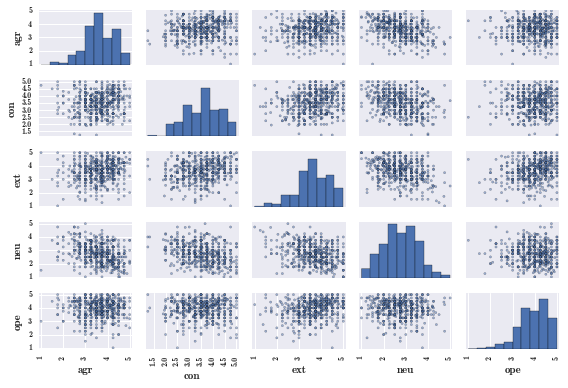

In [8]:
ocean = outAndCont[['agr', 'con', 'ext', 'neu', 'ope']]
axes = pd.tools.plotting.scatter_matrix(ocean)
plt.tight_layout()

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


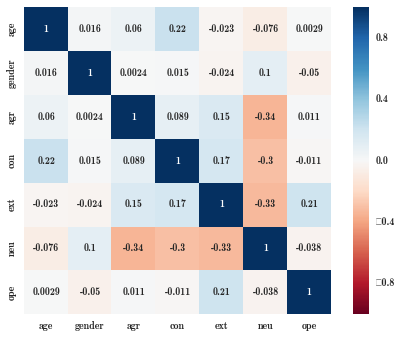

In [9]:
correls = outAndCont.corr()
sns.heatmap(correls, annot=True, square=True, cmap='RdBu')

In [10]:
# get features as a pandas dataframe
fg_vals = fs.fg.getValuesAsDF()

In [11]:
fg_vals.head()

value
group_id                         feat            
003ae43fae340174a67ffbcf19da1549 neighbors      1
                                 all           15
                                 jason          1
                                 <newline>      5
                                 caused         1

In [12]:
values = fg_vals.groupby(level='feat').sum()
values.sort_values(['value'], inplace=True, ascending=False)

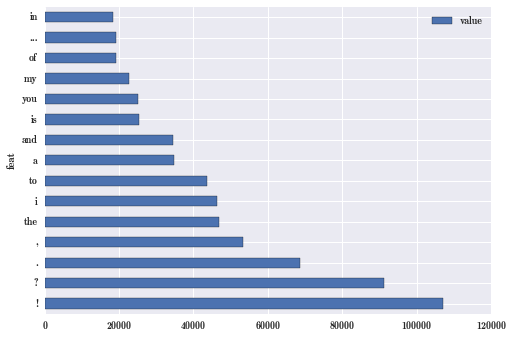

In [13]:
values.head(n=15).plot(kind='barh')

In [14]:
# OOP nonsense
print fs.og == fs.rp.outcomeGetter

True


In [15]:
print fs.og.outcome_value_fields, fs.rp.outcomeGetter.outcome_value_fields

['demog_age', 'demog_gender'] ['demog_age', 'demog_gender']


In [16]:
fs.og.outcome_value_fields = ['demog_age']
print fs.og.outcome_value_fields, fs.rp.outcomeGetter.outcome_value_fields

['demog_age'] ['demog_age']


In [17]:
# default model
print fs.rp.modelName

ridgecv


In [18]:
# change model without editing regressionPredictor.py
fs.rp.modelName = 'ridgefirstpasscv'
print fs.rp.modelName

ridgefirstpasscv


In [19]:
# run combo_test_regression
# note that all output will be saved in this notebook
scores_ridgeFPcv = fs.rp.testControlCombos(nFolds = 2, comboSizes=[0])

Loading Outcomes and Getting Groups for: set(['big5_ope', 'big5_ext', 'demog_age', 'big5_neu', 'big5_agr', 'big5_con'])
SQL QUERY: show tables like 'feat$1gram$msgs_xxx$user_id$16to16'
SQL QUERY: SELECT group_id, sum(value) FROM feat$1gram$msgs_xxx$user_id$16to16  WHERE  group_id in ('e73b38988d4a277a1ac12c258fb33a14','fb2eecbe942c268e0d47a377dde7831a','2a4ea8a5ac157246feedfcf72edad5ff','6a56f67c249e8e14403b3f40231cdde4','e571dcc7fa1a6f1ebb1aba8d05
SQL QUERY: SELECT group_id, feat, group_norm from feat$1gram$msgs_xxx$user_id$16to16 WHERE  group_id in ('e73b38988d4a277a1ac12c258fb33a14','fb2eecbe942c268e0d47a377dde7831a','2a4ea8a5ac157246feedfcf72edad5ff','6a56f67c249e8e14403b3f40231cdde4','e571dcc7fa1a6f1ebb1ab
SQL QUERY: select distinct feat from feat$1gram$msgs_xxx$user_id$16to16 WHERE  group_id in ('e73b38988d4a277a1ac12c258fb33a14','fb2eecbe942c268e0d47a377dde7831a','2a4ea8a5ac157246feedfcf72edad5ff','6a56f67c249e8e14403b3f40231cdde4','e571dcc7fa1a6f1ebb1aba8d05d39b5c',

[number of groups: 499 (2 Folds)]


|COMBO: ()|

= demog_age (w/ lang.)=
-----------------------
Fold 0 
   (feature group: 0): [Initial size: 499]
[Train size: 250    Test size: 249]
[Applying StandardScaler to X[0]: StandardScaler(copy=True, with_mean=True, with_std=True)]
 X[0]: (N, features): (250, 65558)
[Training regression model: ridgefirstpasscv]
model: RidgeCV(alphas=array([  1.00000e+00,   1.00000e-02,   1.00000e-04,   1.00000e+02,
         1.00000e+04,   1.00000e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False) 
  selected alpha: 0.000100
  predict: applying standard scaler to X[0]: StandardScaler(copy=True, with_mean=True, with_std=True)
  predict: combined X shape: (249, 65558)
  predict: regression intercept: 25.860000
  *FOLD R^2: 0.1700 (MSE: 101.7019; MAE: 6.8796; mean train mae: 7.9148)
Fold 1 
   (feature group: 0): [Initial size: 499]
[Train size: 249    Test size: 250]
[Applying StandardScaler to X[0]: 

In [20]:
# easily change model and run again
fs.rp.modelName = 'lassocv'
scores_lassocv = fs.rp.testControlCombos(nFolds = 2, comboSizes=[0])

Loading Outcomes and Getting Groups for: set(['big5_ope', 'big5_ext', 'demog_age', 'big5_neu', 'big5_agr', 'big5_con'])
SQL QUERY: show tables like 'feat$1gram$msgs_xxx$user_id$16to16'
SQL QUERY: SELECT group_id, sum(value) FROM feat$1gram$msgs_xxx$user_id$16to16  WHERE  group_id in ('e73b38988d4a277a1ac12c258fb33a14','fb2eecbe942c268e0d47a377dde7831a','2a4ea8a5ac157246feedfcf72edad5ff','6a56f67c249e8e14403b3f40231cdde4','e571dcc7fa1a6f1ebb1aba8d05
SQL QUERY: SELECT group_id, feat, group_norm from feat$1gram$msgs_xxx$user_id$16to16 WHERE  group_id in ('e73b38988d4a277a1ac12c258fb33a14','fb2eecbe942c268e0d47a377dde7831a','2a4ea8a5ac157246feedfcf72edad5ff','6a56f67c249e8e14403b3f40231cdde4','e571dcc7fa1a6f1ebb1ab
SQL QUERY: select distinct feat from feat$1gram$msgs_xxx$user_id$16to16 WHERE  group_id in ('e73b38988d4a277a1ac12c258fb33a14','fb2eecbe942c268e0d47a377dde7831a','2a4ea8a5ac157246feedfcf72edad5ff','6a56f67c249e8e14403b3f40231cdde4','e571dcc7fa1a6f1ebb1aba8d05d39b5c',

[number of groups: 499 (2 Folds)]


|COMBO: ()|

= demog_age (w/ lang.)=
-----------------------
Fold 0 
   (feature group: 0): [Initial size: 499]
[Train size: 250    Test size: 249]
[Applying StandardScaler to X[0]: StandardScaler(copy=True, with_mean=True, with_std=True)]
 X[0]: (N, features): (250, 65558)


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)



[Training regression model: lassocv]
model: LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=2200, n_alphas=12, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False) 
  selected alpha: 0.005375
  predict: applying standard scaler to X[0]: StandardScaler(copy=True, with_mean=True, with_std=True)
  predict: combined X shape: (249, 65558)
  predict: regression intercept: 25.860000
  *FOLD R^2: 0.1994 (MSE: 98.0966; MAE: 6.5451; mean train mae: 7.9148)
Fold 1 
   (feature group: 0): [Initial size: 499]
[Train size: 249    Test size: 250]
[Applying StandardScaler to X[0]: StandardScaler(copy=True, with_mean=True, with_std=True)]
 X[0]: (N, features): (249, 65558)
[Training regression model: lassocv]
model: LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=2200, n_alphas=12, n_jobs=1, normalize=False, positive=False,
    precompute='aut

In [21]:
# all statistics are saved in variable
for k in scores_ridgeFPcv: 
    for combo in scores_ridgeFPcv[k]:
        for i in scores_ridgeFPcv[k][combo]:
            withLang = combo + ("lang",) if i == 1 else combo
            print '%s %s r: %s %s' % (k, withLang, scores_ridgeFPcv[k][combo][i]['r'], i)

demog_age ('lang',) r: 0.624887185397 1


In [22]:
for k in scores_lassocv: 
    for combo in scores_lassocv[k]:
        for i in scores_lassocv[k][combo]:
            withLang = combo + ("lang",) if i == 1 else combo
            print '%s %s r: %s %s' % (k, withLang, scores_lassocv[k][combo][i]['r'], i)

demog_age ('lang',) r: 0.468307462361 1
